In [23]:
import pandas as pd

In [24]:
crime = pd.read_csv("crime_preprocessed_rf")

In [25]:
crime

,DOW,HourofDay,DaysAgo,OffenseDate,CENSUS_TRACT,CENSUS_BLOCK,LAT,LON,ExtractedMonth,ExtractedDay,UCRdesc_numeric,OffenseYear_numeric,TimeBlock_numeric
0,6,23,1101,2021-06-05 04:41:00,Census Tract 1013,Block 2000,41.483143,-81.766893,6,5,12,3,1
1,7,17,722,2022-06-18 22:23:00,Census Tract 1070,Block 2004,41.434211,-81.683311,6,18,3,4,0
2,7,8,1401,2020-08-08 13:00:00,Census Tract 1176,Block 3001,41.579019,-81.556672,8,8,12,2,2
3,5,2,1452,2020-06-18 07:20:00,Census Tract 1221,Block 2002,41.449064,-81.564849,6,18,26,2,3
4,7,3,722,2022-06-18 08:22:00,Census Tract 1117,Block 1000,41.530355,-81.634045,6,18,10,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
374716,3,21,2343,2018-01-10 02:00:00,Census Tract 1077.01,Block 2050,41.497169,-81.679864,1,10,26,0,1
374717,6,16,2347,2018-01-05 21:00:00,Census Tract 1016.03,Block 2011,41.474377,-81.749953,1,5,4,0,0
374718,3,1,2350,2018-01-02 06:00:00,Census Tract 1235.01,Block 1000,41.464605,-81.782971,1,2,3,0,3
374719,2,23,2351,2018-01-02 04:00:00,Census Tract 1179,Block 1000,41.556780,-81.550443,1,2,24,0,1


In [26]:
#violent_crime_list = [3, 10, 27, 21, 17, 20, 22, 15]
#violent_crime = crime[crime['UCRdesc_numeric'].isin(violent_crime_list)]

In [27]:
crime

,DOW,HourofDay,DaysAgo,OffenseDate,CENSUS_TRACT,CENSUS_BLOCK,LAT,LON,ExtractedMonth,ExtractedDay,UCRdesc_numeric,OffenseYear_numeric,TimeBlock_numeric
0,6,23,1101,2021-06-05 04:41:00,Census Tract 1013,Block 2000,41.483143,-81.766893,6,5,12,3,1
1,7,17,722,2022-06-18 22:23:00,Census Tract 1070,Block 2004,41.434211,-81.683311,6,18,3,4,0
2,7,8,1401,2020-08-08 13:00:00,Census Tract 1176,Block 3001,41.579019,-81.556672,8,8,12,2,2
3,5,2,1452,2020-06-18 07:20:00,Census Tract 1221,Block 2002,41.449064,-81.564849,6,18,26,2,3
4,7,3,722,2022-06-18 08:22:00,Census Tract 1117,Block 1000,41.530355,-81.634045,6,18,10,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
374716,3,21,2343,2018-01-10 02:00:00,Census Tract 1077.01,Block 2050,41.497169,-81.679864,1,10,26,0,1
374717,6,16,2347,2018-01-05 21:00:00,Census Tract 1016.03,Block 2011,41.474377,-81.749953,1,5,4,0,0
374718,3,1,2350,2018-01-02 06:00:00,Census Tract 1235.01,Block 1000,41.464605,-81.782971,1,2,3,0,3
374719,2,23,2351,2018-01-02 04:00:00,Census Tract 1179,Block 1000,41.556780,-81.550443,1,2,24,0,1


In [28]:
crime['OffenseDate'] = pd.to_datetime(crime['OffenseDate'], errors='coerce')
# Step 2: Set 'OffenseDate' as the index
crime.set_index('OffenseDate', inplace=True)

In [29]:
# Step 3: Now group by 'CENSUS_BLOCK' and resample using the 'OffenseDate' index
crime_time_series = crime.groupby(['CENSUS_BLOCK', pd.Grouper(freq='W')]).agg({
    'DOW': 'mean',  
    'HourofDay': 'mean',
    'ExtractedMonth': 'mean',
    'ExtractedDay': 'mean',
}).reset_index()

# Step 4: Create the 'Crime_Count' feature based on size (count of crimes)
crime_time_series['Crime_Count_W'] = crime.groupby(['CENSUS_BLOCK', pd.Grouper(freq='W')]).size().values

# Now the 'violent_crime_time_series' contains the aggregated features and 'Crime_Count'
crime_time_series

,CENSUS_BLOCK,OffenseDate,DOW,HourofDay,ExtractedMonth,ExtractedDay,Crime_Count_W
0,Block 1000,2018-01-07,3.546875,10.906250,1.000000,3.437500,64
1,Block 1000,2018-01-14,3.906977,14.209302,1.000000,10.720930,43
2,Block 1000,2018-01-21,3.722222,14.305556,1.000000,17.944444,36
3,Block 1000,2018-01-28,4.066667,12.666667,1.000000,24.666667,60
4,Block 1000,2018-02-04,4.780488,11.317073,1.658537,11.878049,41
...,...,...,...,...,...,...,...
33305,Block 6006,2022-07-17,4.000000,0.000000,7.000000,13.000000,1
33306,Block 6006,2022-07-31,1.000000,7.500000,7.000000,31.000000,2
33307,Block 6006,2022-10-02,5.000000,17.000000,9.000000,29.000000,1
33308,Block 6006,2022-12-04,5.000000,0.000000,12.000000,1.000000,1


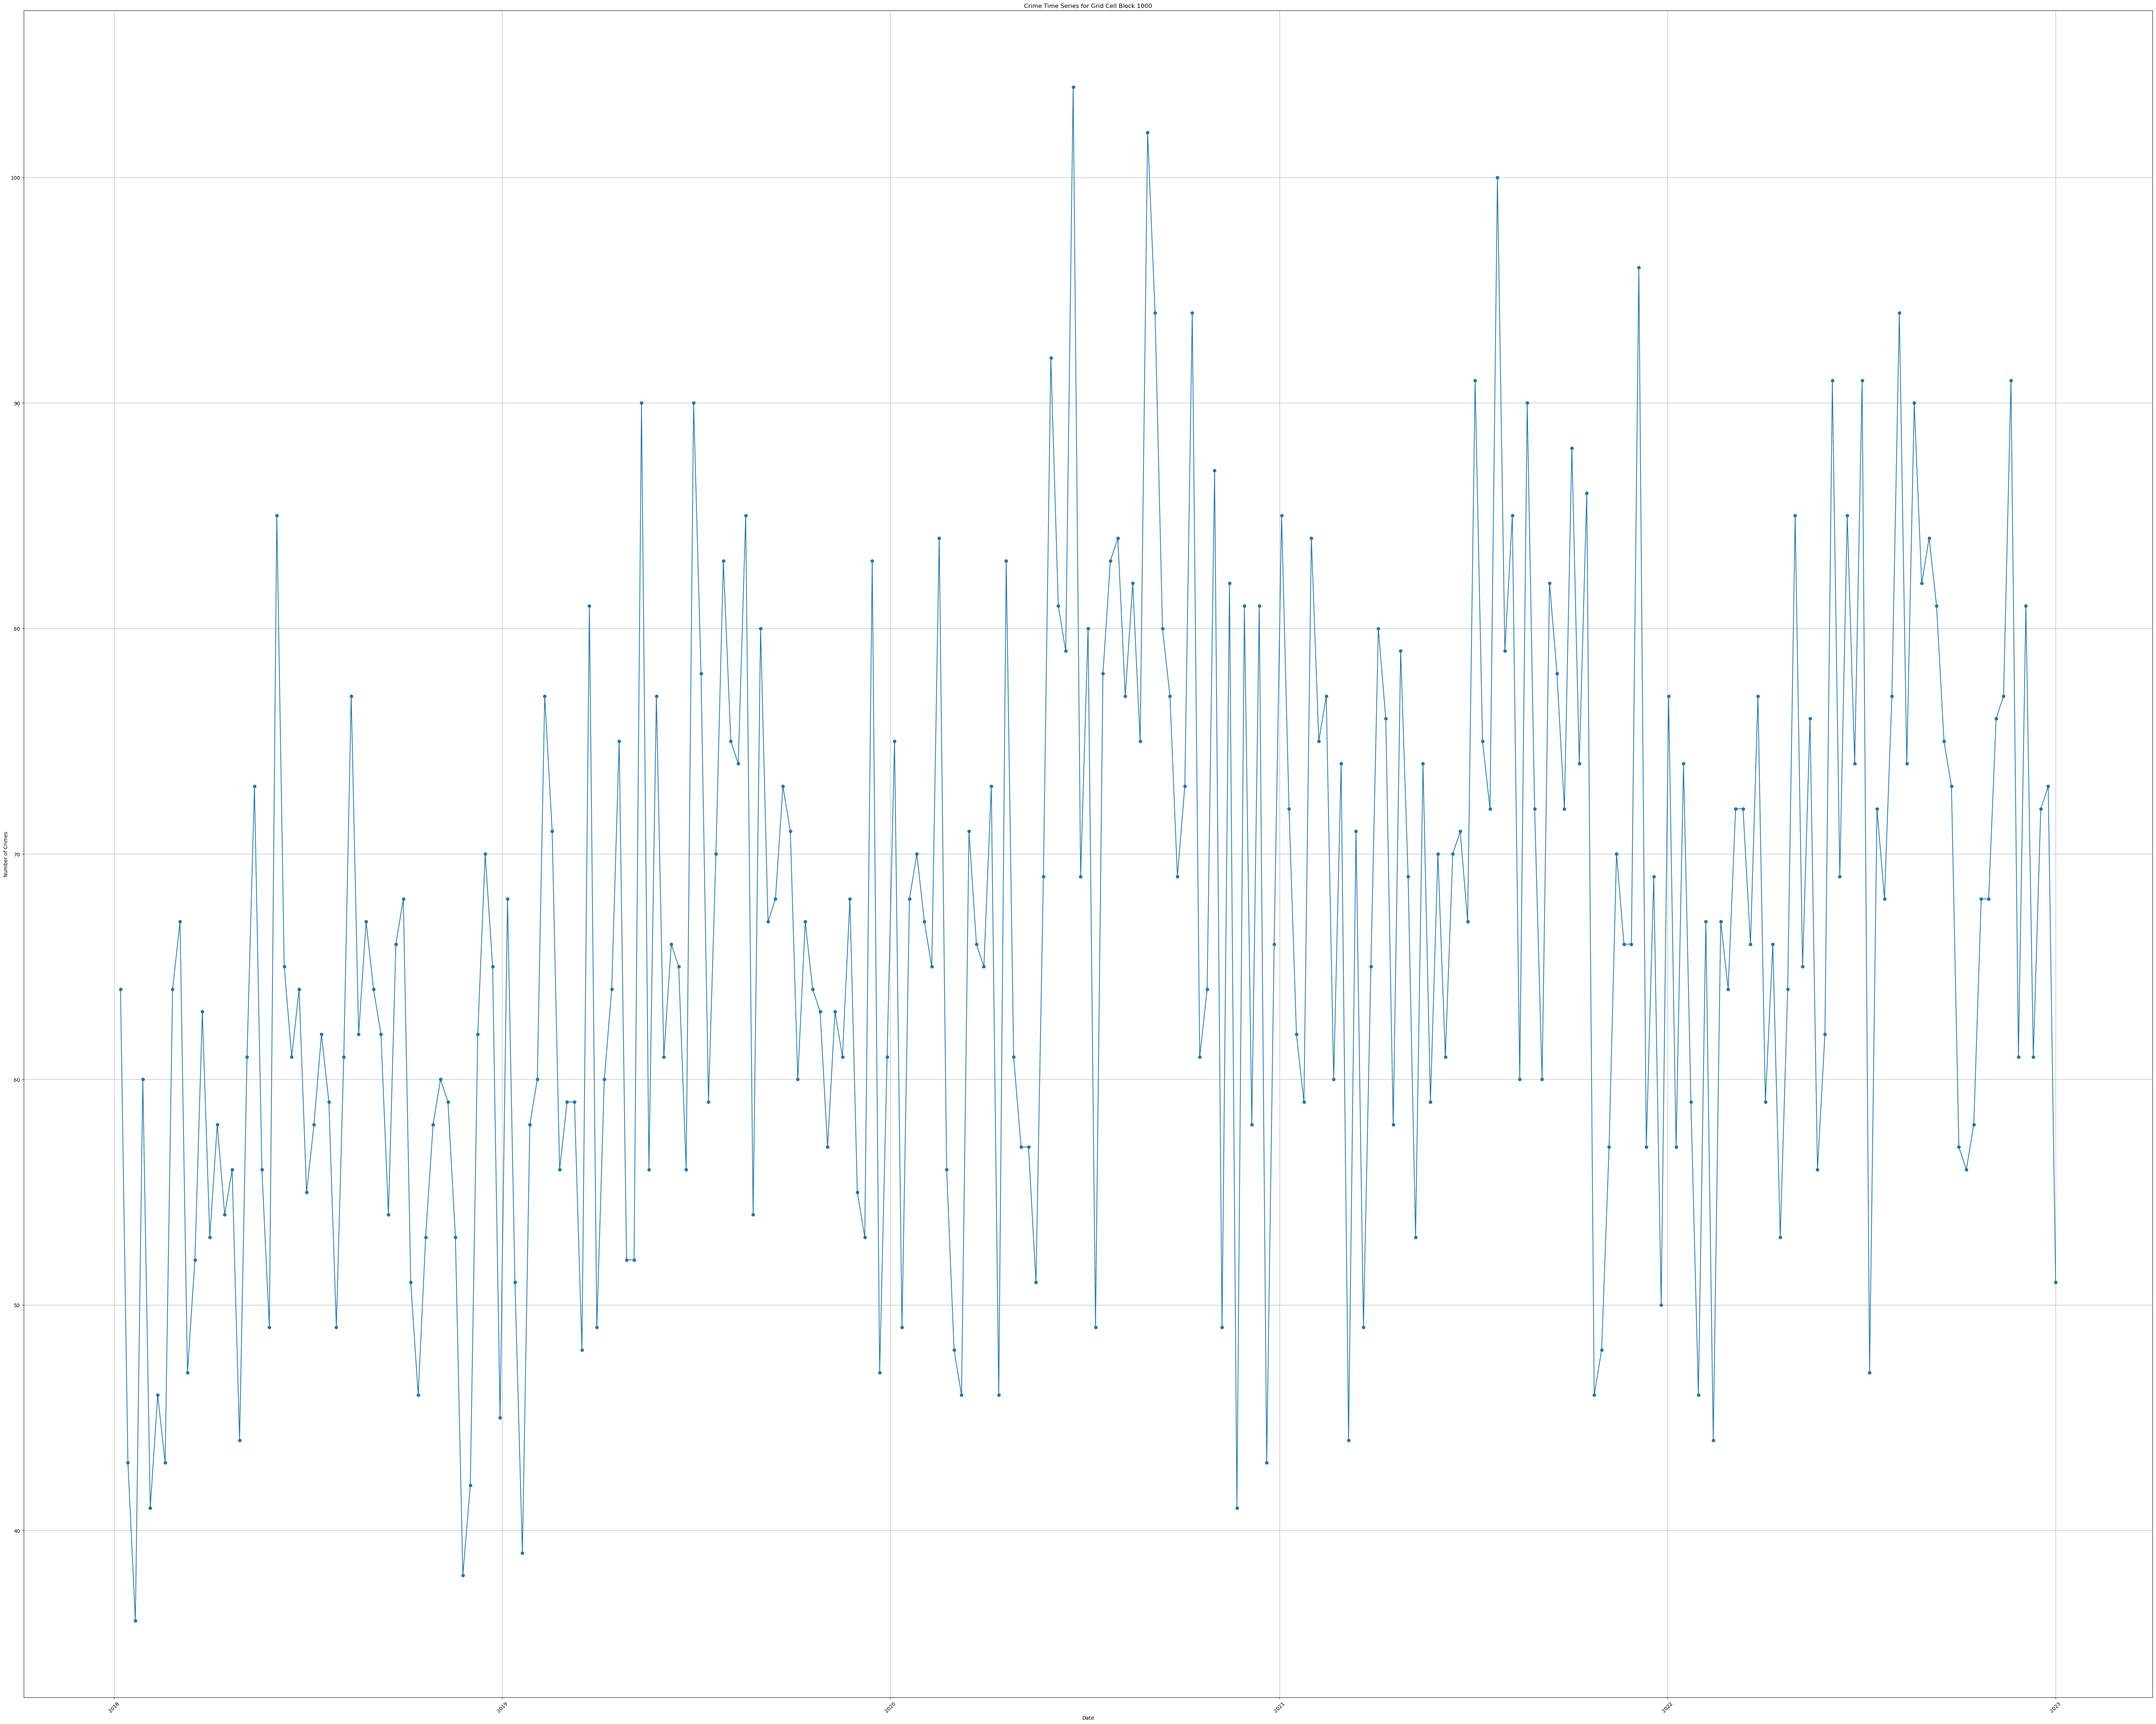

In [30]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Filter data for a specific CENSUS_BLOCK, e.g., (x, y)
block = 'Block 1000'
time_series_data = crime_time_series[crime_time_series['CENSUS_BLOCK'] == block]

# Plot the time series for that CENSUS_TRACT
plt.figure(figsize=(60, 48))
plt.plot(time_series_data['OffenseDate'], time_series_data['Crime_Count_W'], marker='o')
plt.title(f'Crime Time Series for Grid Cell {block}')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')

plt.xticks(rotation=45)

plt.grid(True)

plt.tight_layout()

plt.show()

In [31]:
!pip install xgboost

In [32]:
# feature encode CENSUS_BLOCK
from sklearn.preprocessing import LabelEncoder

crime_time_series['CENSUS_BLOCK'] = crime_time_series['CENSUS_BLOCK'].apply(lambda x: str(x))

le = LabelEncoder()
crime_time_series['CENSUS_BLOCK'] = le.fit_transform(crime_time_series['CENSUS_BLOCK'])

In [33]:
census_tract_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

# Print the mappings
print("CENSUS_BLOCK to Encoded Label Mappings:")
for original, encoded in census_tract_mapping.items():
    print(f"{original} -> {encoded}")

CENSUS_BLOCK to Encoded Label Mappings:
Block 1000 -> 0
Block 1001 -> 1
Block 1002 -> 2
Block 1003 -> 3
Block 1004 -> 4
Block 1005 -> 5
Block 1006 -> 6
Block 1007 -> 7
Block 1008 -> 8
Block 1009 -> 9
Block 1010 -> 10
Block 1011 -> 11
Block 1012 -> 12
Block 1013 -> 13
Block 1014 -> 14
Block 1015 -> 15
Block 1016 -> 16
Block 1017 -> 17
Block 1018 -> 18
Block 1019 -> 19
Block 1020 -> 20
Block 1021 -> 21
Block 1022 -> 22
Block 1023 -> 23
Block 1024 -> 24
Block 1025 -> 25
Block 1026 -> 26
Block 1027 -> 27
Block 1028 -> 28
Block 1029 -> 29
Block 1030 -> 30
Block 1031 -> 31
Block 1032 -> 32
Block 1033 -> 33
Block 1034 -> 34
Block 1035 -> 35
Block 1036 -> 36
Block 1037 -> 37
Block 1038 -> 38
Block 1039 -> 39
Block 1040 -> 40
Block 1041 -> 41
Block 1042 -> 42
Block 1043 -> 43
Block 1044 -> 44
Block 1045 -> 45
Block 1046 -> 46
Block 1047 -> 47
Block 1048 -> 48
Block 1049 -> 49
Block 1050 -> 50
Block 1051 -> 51
Block 1052 -> 52
Block 1053 -> 53
Block 1054 -> 54
Block 1058 -> 55
Block 1059 -> 56
B

In [34]:
crime_time_series.columns

Index(['CENSUS_BLOCK', 'OffenseDate', 'DOW', 'HourofDay', 'ExtractedMonth',
       'ExtractedDay', 'Crime_Count_W'],
      dtype='object')

In [35]:
from sklearn.model_selection import train_test_split

features = ['DOW', 'HourofDay', 'ExtractedMonth', 'ExtractedDay', 'CENSUS_BLOCK']

X = crime_time_series[features]
y = crime_time_series['Crime_Count_W']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

          Feature  Importance
4    CENSUS_BLOCK    0.883461
1       HourofDay    0.030920
0             DOW    0.030880
3    ExtractedDay    0.029248
2  ExtractedMonth    0.025491
Mean Absolute Error: 3.0834599219453622
Root Mean Squared Error: 5.052146799737738
R² Score: 0.873655396515096


C:\Users\singh\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


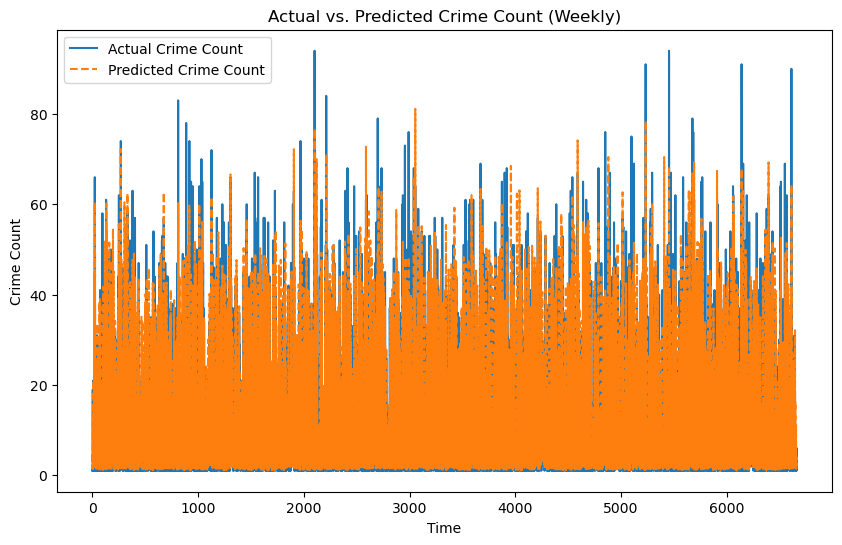

In [36]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importances)

# Calculate error metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R² Score: {r2}')

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Crime Count')
plt.plot(y_pred, label='Predicted Crime Count', linestyle='--')
plt.legend()
plt.title('Actual vs. Predicted Crime Count (Weekly)')
plt.xlabel('Time')
plt.ylabel('Crime Count')
plt.show()

Mean Absolute Error: 2.9279685000365046
Root Mean Squared Error: 4.928157249831723
R² Score: 0.8797807693481445


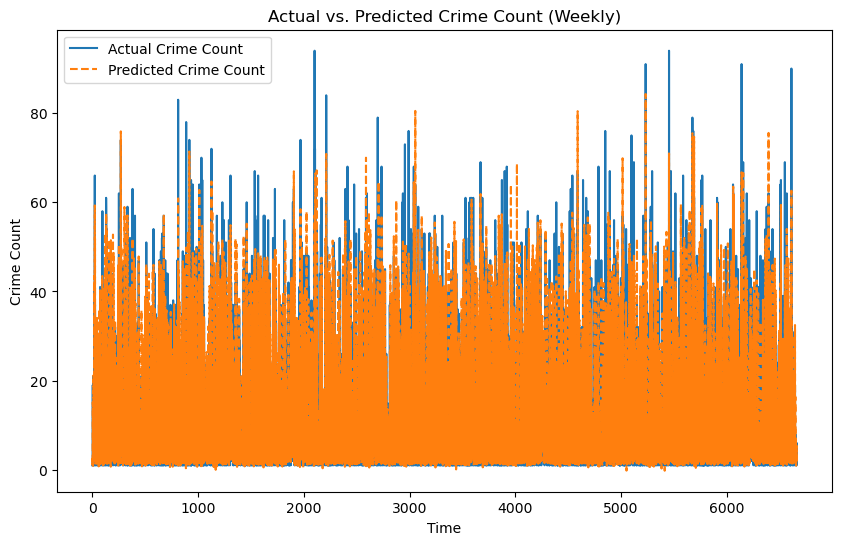

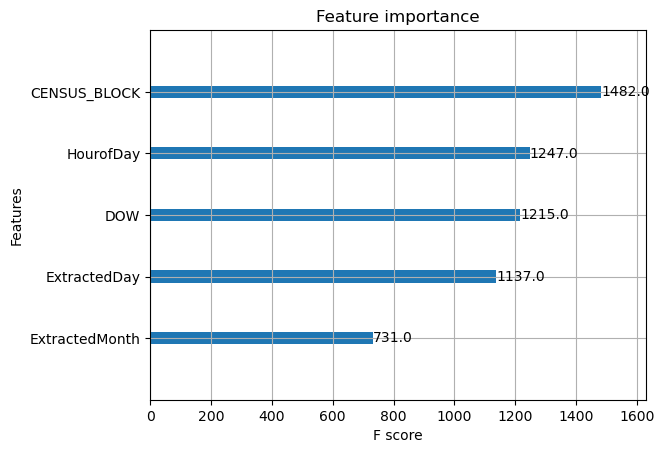

In [37]:
# XGBoost
import xgboost as xgb
from xgboost import XGBRegressor
import numpy as np

xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R² Score: {r2}")

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Crime Count')
plt.plot(y_pred, label='Predicted Crime Count', linestyle='--')
plt.legend()
plt.title('Actual vs. Predicted Crime Count (Weekly)')
plt.xlabel('Time')
plt.ylabel('Crime Count')
plt.show()

xgb.plot_importance(xgb_model)
plt.show()

In [38]:
# Step 3: Now group by 'CENSUS_TRACT' and resample using the 'OffenseDate' index
crime_time_series = crime.groupby(['CENSUS_BLOCK', pd.Grouper(freq='D')]).agg({
    'DOW': 'first',  
    'HourofDay': 'first',
    'ExtractedMonth': 'first',
    'ExtractedDay': 'first',
}).reset_index()

# Step 4: Create the 'Crime_Count' feature based on size (count of crimes)
crime_time_series['Crime_Count_D'] = crime.groupby(['CENSUS_BLOCK', pd.Grouper(freq='D')]).size().values

# Now the 'crime_time_series' contains the aggregated features and 'Crime_Count'
crime_time_series

,CENSUS_BLOCK,OffenseDate,DOW,HourofDay,ExtractedMonth,ExtractedDay,Crime_Count_D
0,Block 1000,2018-01-01,2,15,1,1,20
1,Block 1000,2018-01-02,2,23,1,2,9
2,Block 1000,2018-01-03,4,12,1,3,6
3,Block 1000,2018-01-04,5,3,1,4,4
4,Block 1000,2018-01-05,6,18,1,5,11
...,...,...,...,...,...,...,...
114566,Block 6006,2022-07-13,4,0,7,13,1
114567,Block 6006,2022-07-31,1,12,7,31,2
114568,Block 6006,2022-09-29,5,17,9,29,1
114569,Block 6006,2022-12-01,5,0,12,1,1


In [39]:
# feature encode CENSUS_TRACT
from sklearn.preprocessing import LabelEncoder

crime_time_series['CENSUS_BLOCK'] = crime_time_series['CENSUS_BLOCK'].apply(lambda x: str(x))

le = LabelEncoder()
crime_time_series['CENSUS_BLOCK'] = le.fit_transform(crime_time_series['CENSUS_BLOCK'])

In [40]:
from sklearn.model_selection import train_test_split

features = ['DOW', 'HourofDay', 'ExtractedMonth', 'ExtractedDay', 'CENSUS_BLOCK']

X = crime_time_series[features]
y = crime_time_series['Crime_Count_D']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

          Feature  Importance
4    CENSUS_BLOCK    0.463872
3    ExtractedDay    0.183426
1       HourofDay    0.147065
2  ExtractedMonth    0.104219
0             DOW    0.101418
Mean Absolute Error: 1.6145712415448397
Root Mean Squared Error: 2.3130394767942923
R² Score: 0.38066289165579814


C:\Users\singh\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


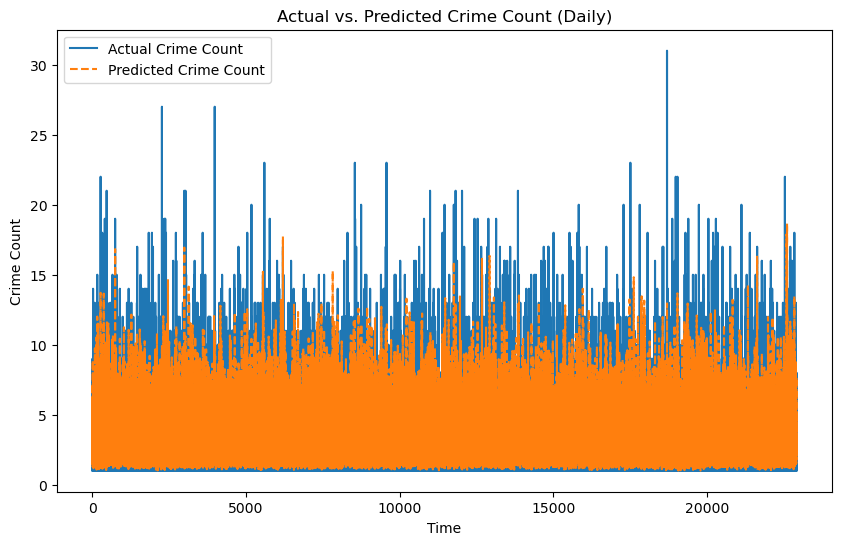

In [41]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importances)

# Calculate error metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R² Score: {r2}')

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Crime Count')
plt.plot(y_pred, label='Predicted Crime Count', linestyle='--')
plt.legend()
plt.title('Actual vs. Predicted Crime Count (Daily)')
plt.xlabel('Time')
plt.ylabel('Crime Count')
plt.show()

Mean Absolute Error: 1.5224359973793646
Root Mean Squared Error: 2.2009592060485126
R² Score: 0.43922966718673706


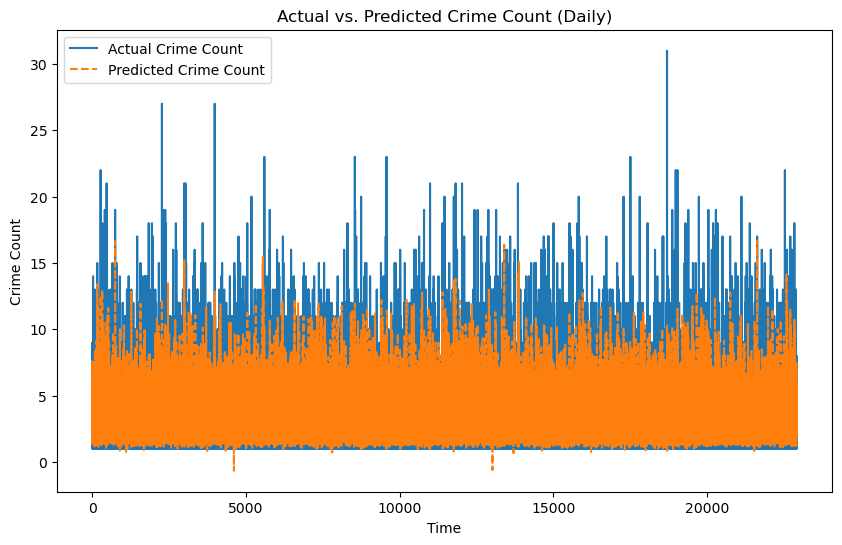

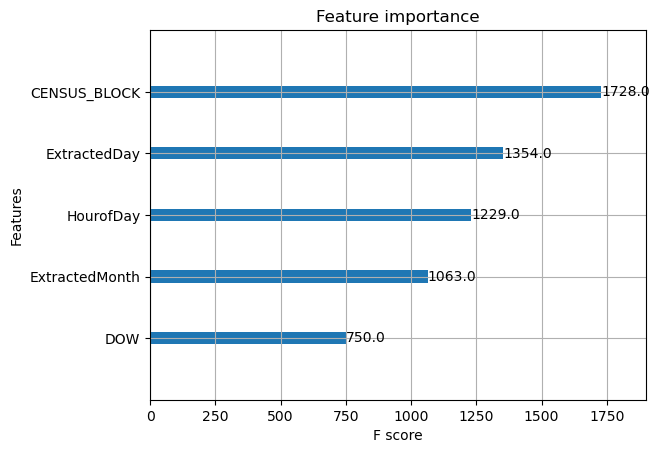

In [42]:
# XGBoost
import xgboost as xgb
from xgboost import XGBRegressor
import numpy as np

xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R² Score: {r2}")

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Crime Count')
plt.plot(y_pred, label='Predicted Crime Count', linestyle='--')
plt.legend()
plt.title('Actual vs. Predicted Crime Count (Daily)')
plt.xlabel('Time')
plt.ylabel('Crime Count')
plt.show()

xgb.plot_importance(xgb_model)
plt.show()